# Digital Reverberator

#### Import required libraries

In [2]:
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

#### Comb Filter-Based Reverb Effect

##### **Step 1. Load and Prepare Audio:**
Reads the audio file, converts stereo to mono if necessary, and normalizes the audio to the range `[-1, 1]`.

##### **Step 2. Set Comb Filter Parameters and Initialize Output Array**
Defines the delay in milliseconds (`delay_ms`), calculates delay_samples, and sets the decay factor (`decay`). Creates an output array (`reverb_audio`) with extra space for delayed reflections.

##### **Step 3. Apply Comb Filter (Early Reflections)**
Iterates through each audio sample, adding the original and delayed signals to the `reverb_audio` array based on the defined delay and decay.

##### **Step 4. Normalize, Save, and Plot Output**
Normalizes the reverb output to prevent clipping, saves it as a .wav file, and plots both original and reverberated audio.

#### **Tips**:
- Set the proper file name!
- Set `delay_ms` as 50, 100, 500, 5000.
- Set `decay` as 0.1, 0.5, 1, and 2 for each delay value.


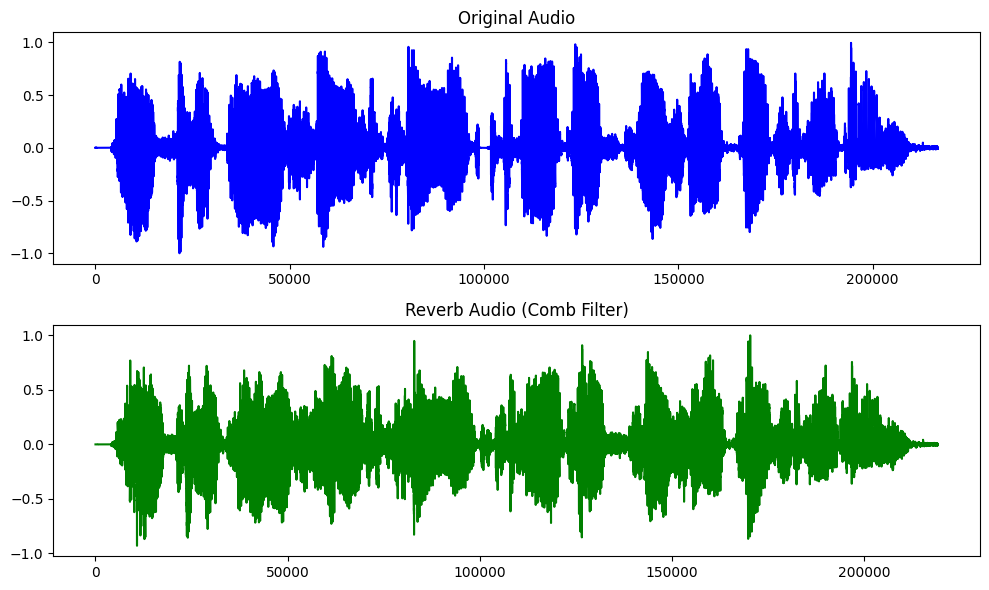

In [6]:
# Load the audio file
filename = 'audio_samples_07/FILE_NAME.wav'  # Replace with your .wav file
sampling_rate, audio = wav.read(filename)

# Ensure audio is mono
if audio.ndim > 1:
    audio = audio.mean(axis=1)

# Normalize audio
audio = audio / np.max(np.abs(audio))

# Comb filter parameters
delay_ms = ?  # Delay in milliseconds for early reflections
delay_samples = int(sampling_rate * delay_ms / 1000)
decay = ?  # Decay factor for the reflections

# Create output array for reverb effect
reverb_audio = np.zeros(len(audio) + delay_samples)

# Apply comb filter (early reflections)
for i in range(len(audio)):
    reverb_audio[i] += audio[i]
    if i + delay_samples < len(reverb_audio):
        reverb_audio[i + delay_samples] += audio[i] * decay

# Normalize output
reverb_audio = reverb_audio / np.max(np.abs(reverb_audio))

# Save and plot
output_filename = 'comb_filter_reverb.wav'
wav.write(output_filename, sampling_rate, (reverb_audio * 32767).astype(np.int16))

# Plot original and reverberated signals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(audio, color="blue")
plt.title('Original Audio')
plt.subplot(2, 1, 2)
plt.plot(reverb_audio, color="green")
plt.title('Reverb Audio (Comb Filter)')
plt.tight_layout()
plt.show()


#### Diffused Reverb Effect Using an All-Pass Filter

##### **Step 1. Load and Prepare Audio**
Reads the audio file, converts it to mono if needed, and normalizes it to the range [-1, 1].

##### **Step 2. Define All-Pass Filter Parameters and Initialize Output Array**
Sets the diffusion delay (`diffusion_delay`) and decay factor (`diffusion_decay`) for the all-pass filter. Creates an output array (`diffused_audio`) to store the final reverb effect.

##### **Step 3. Apply All-Pass Filter for Diffusion**
Loops through each sample of the `reverb_audio`, applying the all-pass filter by blending each sample with a delayed version modified by `diffusion_decay`, producing a smooth diffusion effect.

##### **Step 4. Normalize, Save, and Plot Output**
Normalizes the `diffused_audio` output to keep it within the [-1, 1] range, saves it as a .wav file, and plots both the initial reverb (comb filter output) and the final diffused reverb.

#### **Tips**:
- Set the proper file name!
- Set `diffusion_delay` as 50, 100, 500, 5000.
- Set `diffusion_decay` as 0.1, 0.5, 1, and 2 for each delay value.



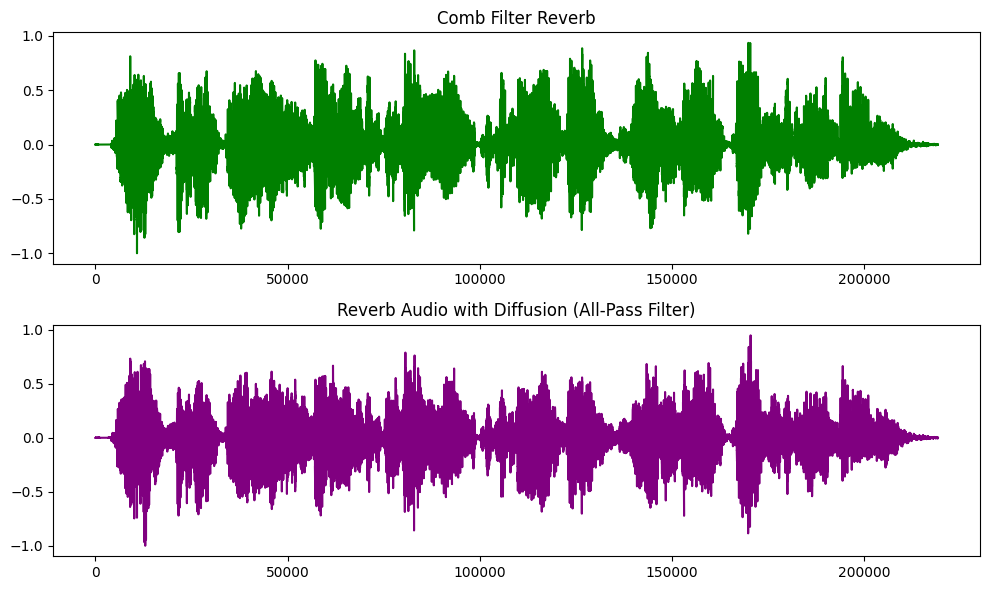

In [4]:
# Load the audio file
filename = 'audio_samples_07/FILE_NAME.wav'  # Replace with your .wav file
sampling_rate, audio = wav.read(filename)

# Ensure audio is mono
if audio.ndim > 1:
    audio = audio.mean(axis=1)

# Normalize audio
audio = audio / np.max(np.abs(audio))

diffusion_delay = ?  # Delay in samples for diffusion
diffusion_decay = ?  # Decay factor for all-pass filter

# Create output array for diffused reverb effect
diffused_audio = np.zeros(len(reverb_audio))

# Apply all-pass filter for diffusion
for i in range(len(reverb_audio)):
    diffused_audio[i] = reverb_audio[i]
    if i >= diffusion_delay:
        diffused_audio[i] += diffusion_decay * diffused_audio[i - diffusion_delay] - diffusion_decay * reverb_audio[i]

# Normalize output
diffused_audio = diffused_audio / np.max(np.abs(diffused_audio))

# Save and plot
output_filename = 'diffused_reverb.wav'
wav.write(output_filename, sampling_rate, (diffused_audio * 32767).astype(np.int16))

# Plot original and diffused signals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(reverb_audio, color="green")
plt.title('Comb Filter Reverb')
plt.subplot(2, 1, 2)
plt.plot(diffused_audio, color="purple")
plt.title('Reverb Audio with Diffusion (All-Pass Filter)')
plt.tight_layout()
plt.show()
